In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn import linear_model 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.svm import SVR
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
df=pd.read_excel(r"C:\Users\pc\Desktop\מדעי הנתונים\project\nomericdata.xlsx",index_col=0)
df.head()

,rate,number of reviews,starting price,cuisins,dress code,payment options,dining style,Patio/Outdoor Dining,Bar/Lounge,Delivery,Beer,Weekend Brunch
0,4.7,1140.0,2,61,2,4,3,1,1,1,1,0
1,4.6,2803.0,2,24,3,4,2,1,1,0,1,1
2,4.7,4007.0,2,98,1,5,1,1,0,0,1,1
3,4.5,6778.0,2,61,1,5,1,1,1,1,1,0
4,4.7,182.0,2,61,2,4,4,1,0,0,1,0


In [3]:
!pip install category_encoders 

target coding, scale to 'number of reviews'

In [4]:
from category_encoders import TargetEncoder
Targetenc = TargetEncoder()

df['cuisins'] = Targetenc.fit_transform(X = df['cuisins'].astype('category'), y = df['rate'])
df['cuisins'] = Targetenc.fit_transform(X = df['cuisins'].astype('category'), y = df['rate'])

scaler = RobustScaler()
df['number of reviews'] = scaler.fit_transform(np.array(df['number of reviews']).reshape(-1,1))


In [5]:
TRAINING_FEATURES = df.columns[df.columns != 'rate']
TARGET_FEATURE    = 'rate'

TRAINING_FEATURES
X = df[TRAINING_FEATURES]
y = df[TARGET_FEATURE]

In [6]:
X.head()

,number of reviews,starting price,cuisins,dress code,payment options,dining style,Patio/Outdoor Dining,Bar/Lounge,Delivery,Beer,Weekend Brunch
0,0.059132,2,4.520307,2,4,3,1,1,1,1,0
1,0.852170,2,4.458919,3,4,2,1,1,0,1,1
2,1.426323,2,4.471756,1,5,1,1,0,0,1,1
3,2.747735,2,4.520307,1,5,1,1,1,1,1,0
4,-0.397711,2,4.520307,2,4,4,1,0,0,1,0


In [7]:
y.head()

0    4.7
1    4.6
2    4.7
3    4.5
4    4.7
Name: rate, dtype: float64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Initial amount of samples: #{}".format(X.shape[0]))
print("Number of training samples: #{}".format(X_train.shape[0]))
print("Number of test samples: #{}".format(X_test.shape[0]))

Initial amount of samples: #4469
Number of training samples: #3575
Number of test samples: #894


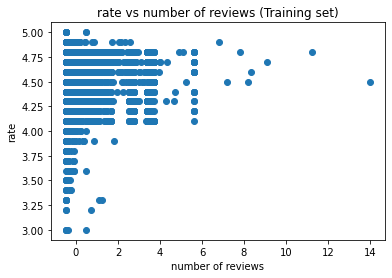

In [9]:
plt.scatter(X_train['number of reviews'],y_train)
plt.title("rate vs number of reviews (Training set)")  
plt.xlabel("number of reviews")
plt.ylabel("rate")
plt.show()


In [10]:
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_test)

# print("Predictions: ",y_pred)
print("R-squared for testing dataset: %.2f" % r2_score(y_test, y_pred))
# y = a1*(number of reviews) + a2*(starting price) + a3*(cuisins)+...+a11(Weekend Brunch)+b
print("coedd: ",model.coef_) # all of the ai in the equation
print("intercept: ",model.intercept_) #the b in the equation

R-squared for testing dataset: 0.05
coedd:  [ 0.01402751  0.02367883  1.00001942  0.00939831 -0.00236314  0.00414278
  0.00258737 -0.02452394  0.00376875 -0.00674045 -0.02181966]
intercept:  -0.030138257223412346


In [11]:
model = Ridge().fit(X_train, y_train)
y_pred = model.predict(X_test)

# print("Predictions: ",y_pred)
print("R-squared for testing dataset: %.2f" % r2_score(y_test, y_pred))
print("coedd: ",model.coef_)
print("intercept: ",model.intercept_)

R-squared for testing dataset: 0.05
coedd:  [ 0.01392663  0.0239079   0.90378959  0.00970375 -0.00243857  0.00390913
  0.00218167 -0.02377412  0.00324003 -0.0073647  -0.02348698]
intercept:  0.40170671348525744


In [12]:
model = SVR().fit(X_train, y_train)
y_pred = model.predict(X_test)
print("R-squared for testing dataset: %.2f" % r2_score(y_test, y_pred))

R-squared for testing dataset: 0.06


In [31]:
model = MLPRegressor(max_iter=200000).fit(X_train, y_train)
y_pred = model.predict(X_test)
#print("Predictions: ",y_pred)
print("R-squared for testing dataset: %.2f" % r2_score(y_test, y_pred))

R-squared for testing dataset: 0.07


In [14]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_pred.tolist()}).head(20)
pred

,Actual,Predicted
0,4.6,4.465157
1,4.2,4.507992
2,4.6,4.440992
3,4.5,4.504476
4,4.7,4.546513
5,4.4,4.498064
6,4.4,4.422199
7,4.6,4.513807
8,4.5,4.461637
9,4.1,4.429548


X-axis - the actual values,
Y-axis - the average of the values that the model predicted with standard deviation

(4.0, 5.0)

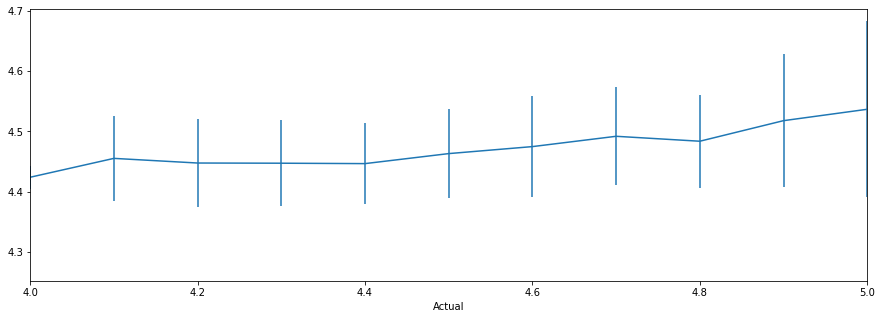

In [32]:
pred = pd.DataFrame({'Actual': y_test.tolist(), 'Predicted': y_pred.tolist()})
pred.groupby('Actual')['Predicted'].mean().plot(figsize=(15, 5),yerr=pred.groupby('Actual')['Predicted'].std())
plt.xlim(4,5)